In [1]:
import pandas as pd
from prophet import Prophet

df = pd.read_csv('medium_posts.csv')
df.head()

,published,domain,url
0,2012-08-13 22:54:53.510Z,medium.com,https://medium.com/policy/medium-terms-of-serv...
1,2012-08-13 22:57:17.248Z,medium.com,https://medium.com/policy/medium-privacy-polic...
2,2016-11-04 23:40:43.364Z,medium.com,https://medium.com/@Medium/personalize-your-me...
3,2016-12-24 18:21:13.427Z,medium.com,https://medium.com/holiday-poems/xmas-morning-...
4,2015-09-22 21:37:48.207Z,blog.medium.com,https://blog.medium.com/taking-a-side-on-net-n...


In [2]:
df['published_date'] = pd.to_datetime(df['published']).dt.date
df.head()

,published,domain,url,published_date
0,2012-08-13 22:54:53.510Z,medium.com,https://medium.com/policy/medium-terms-of-serv...,2012-08-13
1,2012-08-13 22:57:17.248Z,medium.com,https://medium.com/policy/medium-privacy-polic...,2012-08-13
2,2016-11-04 23:40:43.364Z,medium.com,https://medium.com/@Medium/personalize-your-me...,2016-11-04
3,2016-12-24 18:21:13.427Z,medium.com,https://medium.com/holiday-poems/xmas-morning-...,2016-12-24
4,2015-09-22 21:37:48.207Z,blog.medium.com,https://blog.medium.com/taking-a-side-on-net-n...,2015-09-22


In [3]:
df_by_day = df['published_date'].value_counts().sort_index()
df_by_day

1970-01-01      2
1970-01-18      3
2003-09-14      1
2004-04-04      1
2004-04-16      1
             ... 
2017-06-23    421
2017-06-24    277
2017-06-25    253
2017-06-26    207
2017-06-27     36
Name: published_date, Length: 1738, dtype: int64

In [4]:
df_by_day = df_by_day.iloc[2:]
df_by_day.head()

2003-09-14    1
2004-04-04    1
2004-04-16    1
2005-09-12    1
2006-02-19    1
Name: published_date, dtype: int64

In [5]:
df_by_day = df_by_day.to_frame()
df_by_day['ds'] = df_by_day.index

In [6]:
df_by_day.rename(columns={"published_date":"y"}, inplace=True)

In [7]:
df_by_day.head()

,y,ds
2003-09-14,1,2003-09-14
2004-04-04,1,2004-04-04
2004-04-16,1,2004-04-16
2005-09-12,1,2005-09-12
2006-02-19,1,2006-02-19


In [8]:
import datetime

cut_date = datetime.date(2011, 1, 1)
df_by_day = df_by_day[df_by_day.ds > cut_date]
df_by_day

,y,ds
2011-01-14,1,2011-01-14
2011-02-01,1,2011-02-01
2011-03-22,1,2011-03-22
2011-03-23,1,2011-03-23
2011-03-25,1,2011-03-25
...,...,...
2017-06-23,421,2017-06-23
2017-06-24,277,2017-06-24
2017-06-25,253,2017-06-25
2017-06-26,207,2017-06-26


In [9]:
import logging
logging.getLogger('cmdstanpy').setLevel(logging.ERROR)
m = Prophet()
m.add_seasonality(name='monthly', period=30.4, fourier_order=5)
m.fit(df_by_day)
future = m.make_future_dataframe(periods=365)
future.tail()

11:16:03 - cmdstanpy - INFO - Chain [1] start processing
11:16:03 - cmdstanpy - INFO - Chain [1] done processing


,ds
2062,2018-06-23
2063,2018-06-24
2064,2018-06-25
2065,2018-06-26
2066,2018-06-27


In [10]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2062,2018-06-23,446.616485,416.134055,480.307623
2063,2018-06-24,444.932329,410.798057,478.910798
2064,2018-06-25,468.530376,435.375724,502.470671
2065,2018-06-26,467.766708,434.698092,503.101610
2066,2018-06-27,469.065255,434.937680,504.077718


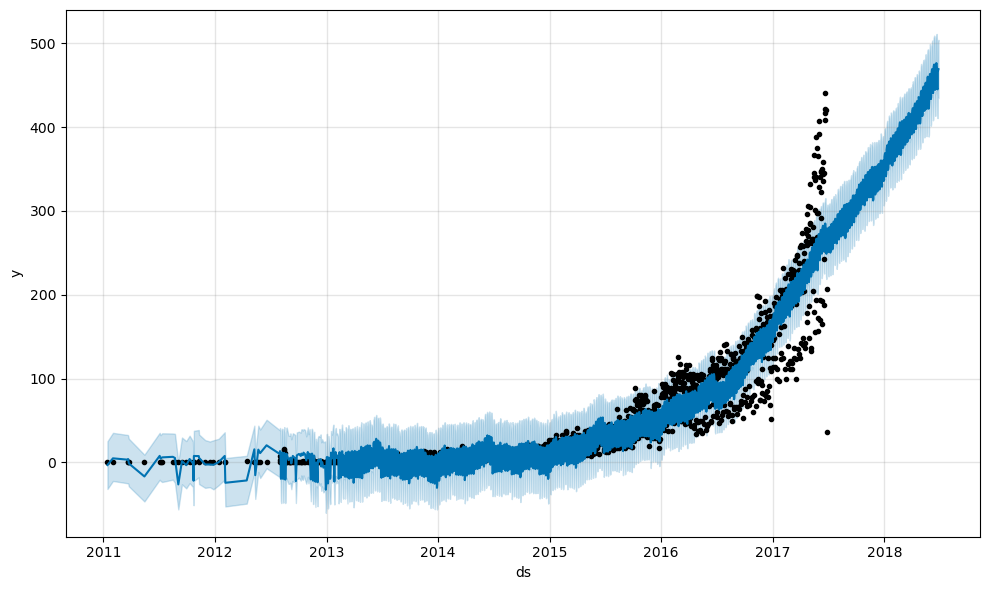

In [11]:
fig1 = m.plot(forecast)

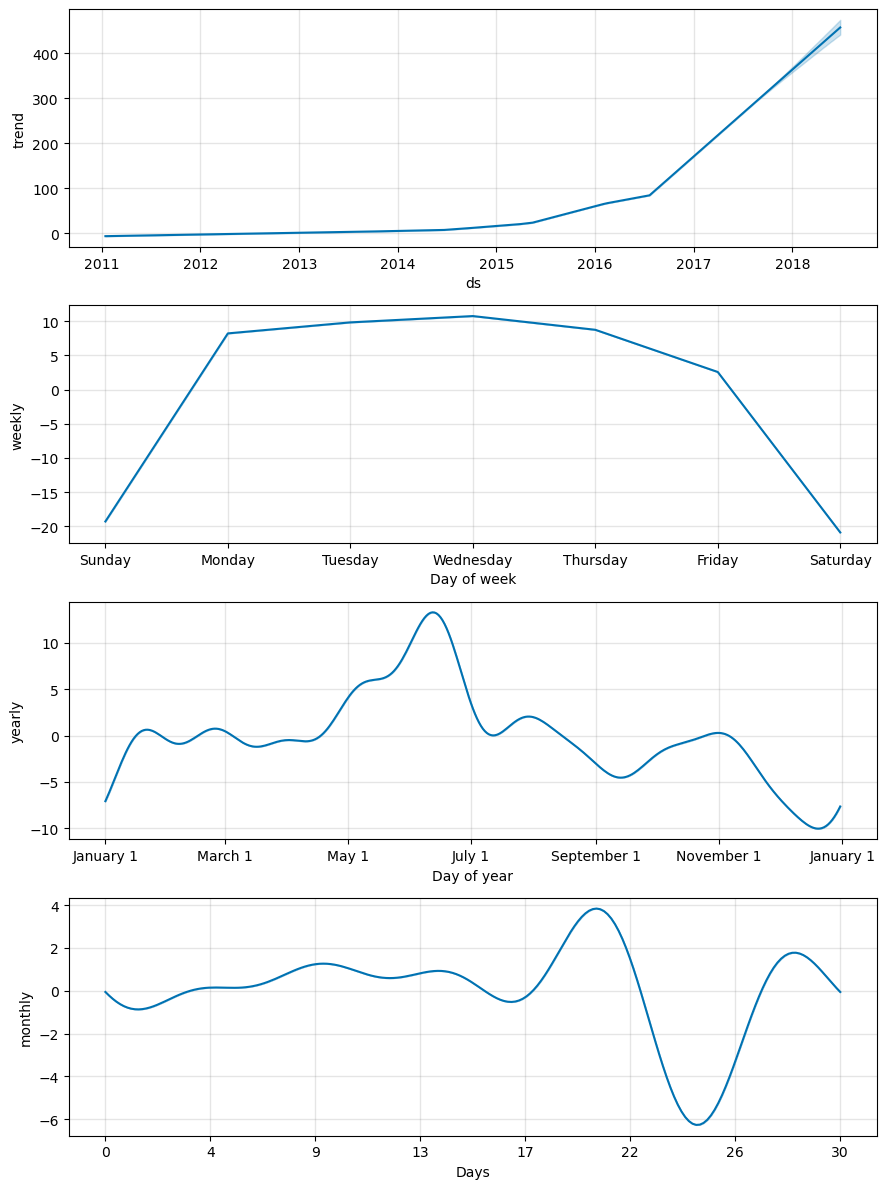

In [12]:
fig2 = m.plot_components(forecast)

In [13]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

  0%|          | 0/8 [00:00<?, ?it/s]

11:16:04 - cmdstanpy - INFO - Chain [1] start processing
11:16:04 - cmdstanpy - INFO - Chain [1] done processing
11:16:04 - cmdstanpy - INFO - Chain [1] start processing
11:16:04 - cmdstanpy - INFO - Chain [1] done processing
11:16:04 - cmdstanpy - INFO - Chain [1] start processing
11:16:04 - cmdstanpy - INFO - Chain [1] done processing
11:16:04 - cmdstanpy - INFO - Chain [1] start processing
11:16:04 - cmdstanpy - INFO - Chain [1] done processing
11:16:04 - cmdstanpy - INFO - Chain [1] start processing
11:16:05 - cmdstanpy - INFO - Chain [1] done processing
11:16:05 - cmdstanpy - INFO - Chain [1] start processing
11:16:05 - cmdstanpy - INFO - Chain [1] done processing
11:16:05 - cmdstanpy - INFO - Chain [1] start processing
11:16:05 - cmdstanpy - INFO - Chain [1] done processing
11:16:05 - cmdstanpy - INFO - Chain [1] start processing
11:16:05 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2013-01-15,2.791078,0.731841,5.000234,4,2013-01-14
1,2013-01-18,-1.419451,-3.597929,0.523196,1,2013-01-14
2,2013-01-22,-1.211549,-3.354420,0.921227,1,2013-01-14
3,2013-01-23,-0.507048,-2.777029,1.714560,2,2013-01-14
4,2013-01-26,-1.093901,-3.282451,1.176918,1,2013-01-14


In [14]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,39 days,140.806633,11.866197,7.650810,0.493174,0.265580,0.388621,0.443948
1,40 days,144.326890,12.013613,7.715517,0.491760,0.265577,0.387808,0.448909
2,41 days,148.906259,12.202715,7.771692,0.485078,0.265577,0.383772,0.452877
3,42 days,152.920636,12.366108,7.821756,0.486249,0.266696,0.381725,0.459635
4,43 days,146.638829,12.109452,7.644184,0.483207,0.265363,0.377439,0.461806


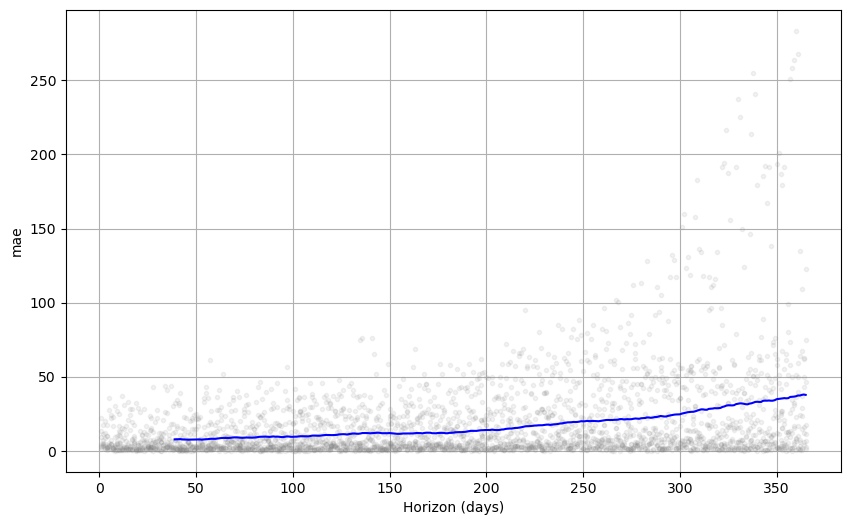

In [15]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mae')

In [16]:
import itertools
import numpy as np
import pandas as pd

import logging
logging.getLogger('cmdstanpy').setLevel(logging.CRITICAL)

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'holidays_prior_scale' : [0.01, 0.1, 1.0, 10.0],
    'seasonality_mode' : ['additive', 'multiplicative'],
    'changepoint_range' : [0.8, 0.95]
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here
maes = []

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params)
    m.add_seasonality(name='monthly', period=30.4, fourier_order=5)
    m.fit(df_by_day)  # Fit model with given params
#     df_cv = cross_validation(m, cutoffs=cutoffs, horizon='30 days', parallel="processes")
    df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])
    maes.append(df_p['mae'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
tuning_results['mae'] = maes
print(tuning_results)

Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Fall

Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Fall

     changepoint_prior_scale  seasonality_prior_scale  holidays_prior_scale  \
0                      0.001                     0.01                  0.01   
1                      0.001                     0.01                  0.01   
2                      0.001                     0.01                  0.01   
3                      0.001                     0.01                  0.01   
4                      0.001                     0.01                  0.10   
..                       ...                      ...                   ...   
251                    0.500                    10.00                  1.00   
252                    0.500                    10.00                 10.00   
253                    0.500                    10.00                 10.00   
254                    0.500                    10.00                 10.00   
255                    0.500                    10.00                 10.00   

    seasonality_mode  changepoint_range       rmse 

In [17]:
tuning_results.sort_values('mae').head(40)

,changepoint_prior_scale,seasonality_prior_scale,holidays_prior_scale,seasonality_mode,changepoint_range,rmse,mae
143,0.1,0.01,10.00,multiplicative,0.95,29.877400,15.100293
131,0.1,0.01,0.01,multiplicative,0.95,29.877400,15.100293
135,0.1,0.01,0.10,multiplicative,0.95,29.877400,15.100293
139,0.1,0.01,1.00,multiplicative,0.95,29.877400,15.100293
206,0.5,0.01,10.00,multiplicative,0.80,29.885274,15.302525
202,0.5,0.01,1.00,multiplicative,0.80,29.885274,15.302525
198,0.5,0.01,0.10,multiplicative,0.80,29.885274,15.302525
194,0.5,0.01,0.01,multiplicative,0.80,29.885274,15.302525
130,0.1,0.01,0.01,multiplicative,0.80,30.022443,15.329031
134,0.1,0.01,0.10,multiplicative,0.80,30.022443,15.329031


## Second version of tuning - Optuna

In [18]:
import optuna

trials_number = 256

def objective(trial) -> float:
    changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.001, 1.0)
    seasonality_prior_scale = trial.suggest_loguniform('seasonality_prior_scale', 0.01, 100.0)
    holidays_prior_scale = trial.suggest_loguniform('holidays_prior_scale', 0.01, 100.0)
    seasonality_mode = trial.suggest_categorical('seasonality_mode', ['additive', 'multiplicative'])
    changepoint_range = trial.suggest_uniform('changepoint_range', 0.65, 0.95)

    m = Prophet(changepoint_prior_scale=changepoint_prior_scale, seasonality_prior_scale=seasonality_prior_scale,
               holidays_prior_scale=holidays_prior_scale, seasonality_mode=seasonality_mode,
               changepoint_range=changepoint_range)
    m.add_seasonality(name='monthly', period=30.4, fourier_order=5)
    m.fit(df_by_day)  # Fit model with given params
    df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])
    maes.append(df_p['mae'].values[0])

    score = df_p['mae'].values[0]
    print("  MAE: {}".format(df_p['mae'].values[0]))
    print("  RMSE: {}".format(df_p['rmse'].values[0]))

    print("  Params for trial " + str(trial.number) + ": ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))
    return score

study_name = 'medium-monthly-study-cut-first-years'
storage_name = "sqlite:///{}.db".format(study_name)
study = optuna.create_study(study_name=study_name, direction="minimize", storage=storage_name, load_if_exists=True,)

study.enqueue_trial({
        "changepoint_prior_scale": 0.05,
        "seasonality_prior_scale": 10.0,
        "holidays_prior_scale": 10.0,
        "seasonality_mode": "additive",
        "changepoint_range": 0.8
    })

optuna.logging.set_verbosity(optuna.logging.WARNING)
study.optimize(objective, n_trials=trials_number)

[I 2023-03-11 11:21:53,746] A new study created in RDB with name: medium-monthly-study-cut-first-years
/tmp/ipykernel_164877/3789993363.py:35: ExperimentalWarning: enqueue_trial is experimental (supported from v1.2.0). The interface can change in the future.
  study.enqueue_trial({
/home/jsowa/anaconda3/envs/prophetenv/lib/python3.11/site-packages/optuna/study/study.py:857: ExperimentalWarning: create_trial is experimental (supported from v2.0.0). The interface can change in the future.
  create_trial(state=TrialState.WAITING, system_attrs={"fixed_params": params})
/home/jsowa/anaconda3/envs/prophetenv/lib/python3.11/site-packages/optuna/study/study.py:856: ExperimentalWarning: add_trial is experimental (supported from v2.0.0). The interface can change in the future.
  self.add_trial(


  MAE: 17.970119416650245
  RMSE: 33.78803567169072
  Params for trial 0: 
    changepoint_prior_scale: 0.05
    seasonality_prior_scale: 10.0
    holidays_prior_scale: 10.0
    seasonality_mode: additive
    changepoint_range: 0.8
  MAE: 14.938884894065573
  RMSE: 29.50765053733071
  Params for trial 1: 
    changepoint_prior_scale: 0.12784168765740442
    seasonality_prior_scale: 0.021046596617415734
    holidays_prior_scale: 27.39309216460479
    seasonality_mode: multiplicative
    changepoint_range: 0.7889513910955706
  MAE: 20.127459844147808
  RMSE: 36.5746102646972
  Params for trial 2: 
    changepoint_prior_scale: 0.011328087092921357
    seasonality_prior_scale: 7.027750499493014
    holidays_prior_scale: 0.30004761406046704
    seasonality_mode: additive
    changepoint_range: 0.8318245403301542
  MAE: 18.815332341101236
  RMSE: 34.80490463606966
  Params for trial 3: 
    changepoint_prior_scale: 0.023214197186481256
    seasonality_prior_scale: 0.25913961022572857
    hol

Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.


  MAE: 31.23678407075843
  RMSE: 54.310651476329696
  Params for trial 15: 
    changepoint_prior_scale: 0.0011078139535970382
    seasonality_prior_scale: 0.012640979361476233
    holidays_prior_scale: 2.8771114073066606
    seasonality_mode: multiplicative
    changepoint_range: 0.7268628901360467
  MAE: 15.976458233198075
  RMSE: 30.459486756610637
  Params for trial 16: 
    changepoint_prior_scale: 0.27498621151614916
    seasonality_prior_scale: 0.29611791985246017
    holidays_prior_scale: 31.247470939232475
    seasonality_mode: multiplicative
    changepoint_range: 0.7933765924056541
  MAE: 16.714253627561796
  RMSE: 32.161897297916894
  Params for trial 17: 
    changepoint_prior_scale: 0.9856439781985414
    seasonality_prior_scale: 2.078356580800998
    holidays_prior_scale: 3.926274113407963
    seasonality_mode: multiplicative
    changepoint_range: 0.908378350550234
  MAE: 16.35064997354429
  RMSE: 31.131063153492015
  Params for trial 18: 
    changepoint_prior_scale: 0

Optimization terminated abnormally. Falling back to Newton.


  MAE: 19.579925104420646
  RMSE: 34.4399908715982
  Params for trial 19: 
    changepoint_prior_scale: 0.012717632773489846
    seasonality_prior_scale: 0.23109406046965242
    holidays_prior_scale: 6.221690357591909
    seasonality_mode: multiplicative
    changepoint_range: 0.6574663082280382
  MAE: 17.348826564414153
  RMSE: 31.756333922280316
  Params for trial 20: 
    changepoint_prior_scale: 0.1772431425020804
    seasonality_prior_scale: 1.3093657172151114
    holidays_prior_scale: 0.9323576530441904
    seasonality_mode: multiplicative
    changepoint_range: 0.720210696438048
  MAE: 15.574550141264751
  RMSE: 29.916018834834304
  Params for trial 21: 
    changepoint_prior_scale: 0.2123024374875361
    seasonality_prior_scale: 0.01030575275038129
    holidays_prior_scale: 92.85244579899914
    seasonality_mode: multiplicative
    changepoint_range: 0.7605520581315797
  MAE: 15.198082251352456
  RMSE: 29.835703513577194
  Params for trial 22: 
    changepoint_prior_scale: 0.13

  MAE: 16.87532929116517
  RMSE: 31.765874374125307
  Params for trial 47: 
    changepoint_prior_scale: 0.02207927601408763
    seasonality_prior_scale: 0.017624760608186962
    holidays_prior_scale: 12.358568612046746
    seasonality_mode: multiplicative
    changepoint_range: 0.8621495336123186
  MAE: 16.65785555415612
  RMSE: 31.347234620570706
  Params for trial 48: 
    changepoint_prior_scale: 0.06408154478879946
    seasonality_prior_scale: 0.07219515607221078
    holidays_prior_scale: 20.52584501923031
    seasonality_mode: multiplicative
    changepoint_range: 0.8262998754377842
  MAE: 17.108919969372856
  RMSE: 32.99130427139849
  Params for trial 49: 
    changepoint_prior_scale: 0.11931540366041522
    seasonality_prior_scale: 0.01973472865570691
    holidays_prior_scale: 9.545292281993211
    seasonality_mode: additive
    changepoint_range: 0.8762891474923005


Optimization terminated abnormally. Falling back to Newton.


  MAE: 15.995765975462088
  RMSE: 30.886749759762324
  Params for trial 50: 
    changepoint_prior_scale: 0.031776141119437336
    seasonality_prior_scale: 0.013797324539285704
    holidays_prior_scale: 0.011277319429185991
    seasonality_mode: multiplicative
    changepoint_range: 0.8622136727802426
  MAE: 15.219521504179072
  RMSE: 30.057999879300922
  Params for trial 51: 
    changepoint_prior_scale: 0.09366536197478449
    seasonality_prior_scale: 0.02941019184725776
    holidays_prior_scale: 21.404314725081132
    seasonality_mode: multiplicative
    changepoint_range: 0.822110060342128
  MAE: 14.741608192275859
  RMSE: 29.40532291787361
  Params for trial 52: 
    changepoint_prior_scale: 0.17429993969154153
    seasonality_prior_scale: 0.025304416366495684
    holidays_prior_scale: 27.302517272310645
    seasonality_mode: multiplicative
    changepoint_range: 0.8431832271279852
  MAE: 14.603981261366505
  RMSE: 29.262430699716106
  Params for trial 53: 
    changepoint_prior_s

Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.


  MAE: 32.38520161090919
  RMSE: 56.16934338920052
  Params for trial 69: 
    changepoint_prior_scale: 0.001068992367148104
    seasonality_prior_scale: 0.02295892457443575
    holidays_prior_scale: 28.40456518198275
    seasonality_mode: additive
    changepoint_range: 0.7996246368814952
  MAE: 14.88874909199716
  RMSE: 29.6159666049768
  Params for trial 70: 
    changepoint_prior_scale: 0.15160203659936372
    seasonality_prior_scale: 0.030554664818099996
    holidays_prior_scale: 39.8266990165968
    seasonality_mode: multiplicative
    changepoint_range: 0.8530340015588062
  MAE: 14.693805534307668
  RMSE: 29.452283784204333
  Params for trial 71: 
    changepoint_prior_scale: 0.11233326699420579
    seasonality_prior_scale: 0.01825798853099867
    holidays_prior_scale: 14.829175434058733
    seasonality_mode: multiplicative
    changepoint_range: 0.8259456128462509
  MAE: 14.857545782617526
  RMSE: 29.67938098566298
  Params for trial 72: 
    changepoint_prior_scale: 0.07690626

  MAE: 14.575132851577811
  RMSE: 29.64893399173633
  Params for trial 97: 
    changepoint_prior_scale: 0.9914687906864076
    seasonality_prior_scale: 0.03146093067337675
    holidays_prior_scale: 53.54977056086035
    seasonality_mode: multiplicative
    changepoint_range: 0.847187601884905
  MAE: 17.29320820781569
  RMSE: 33.68745614535768
  Params for trial 98: 
    changepoint_prior_scale: 0.5709950254809038
    seasonality_prior_scale: 0.031247863882794973
    holidays_prior_scale: 61.72262381437352
    seasonality_mode: additive
    changepoint_range: 0.8143581705701518
  MAE: 14.739957087804173
  RMSE: 29.538317917710682
  Params for trial 99: 
    changepoint_prior_scale: 0.6777865933145798
    seasonality_prior_scale: 0.01585336149485475
    holidays_prior_scale: 47.31803491507483
    seasonality_mode: multiplicative
    changepoint_range: 0.8448765410629732
  MAE: 15.18493448883713
  RMSE: 29.89039657113389
  Params for trial 100: 
    changepoint_prior_scale: 0.53277034235

  MAE: 14.415227317443808
  RMSE: 28.938693367837377
  Params for trial 125: 
    changepoint_prior_scale: 0.4792964967024169
    seasonality_prior_scale: 0.02274061014597418
    holidays_prior_scale: 32.25897560645149
    seasonality_mode: multiplicative
    changepoint_range: 0.8593205494911001
  MAE: 14.848656971569403
  RMSE: 29.564391681575998
  Params for trial 126: 
    changepoint_prior_scale: 0.5009439483139009
    seasonality_prior_scale: 0.013771159989737937
    holidays_prior_scale: 24.212973089953415
    seasonality_mode: multiplicative
    changepoint_range: 0.8612053538978136
  MAE: 14.77732335002807
  RMSE: 29.517008746074495
  Params for trial 127: 
    changepoint_prior_scale: 0.3103526502553787
    seasonality_prior_scale: 0.023700957344485518
    holidays_prior_scale: 31.564725463371833
    seasonality_mode: multiplicative
    changepoint_range: 0.9349805363180438
  MAE: 14.920595615079785
  RMSE: 29.49751563698083
  Params for trial 128: 
    changepoint_prior_scal

  MAE: 14.374413169869724
  RMSE: 28.798833450361656
  Params for trial 153: 
    changepoint_prior_scale: 0.2861119759543725
    seasonality_prior_scale: 0.023366751183702163
    holidays_prior_scale: 0.9634327096391831
    seasonality_mode: multiplicative
    changepoint_range: 0.8886261237524096
  MAE: 14.475621200813494
  RMSE: 29.04472795679565
  Params for trial 154: 
    changepoint_prior_scale: 0.2687113137717631
    seasonality_prior_scale: 0.027392206045677357
    holidays_prior_scale: 1.5430311644774808
    seasonality_mode: multiplicative
    changepoint_range: 0.8811517161639831
  MAE: 14.431277315778178
  RMSE: 28.95746728103111
  Params for trial 155: 
    changepoint_prior_scale: 0.3018065778579616
    seasonality_prior_scale: 0.026524964978245486
    holidays_prior_scale: 1.0281220879473725
    seasonality_mode: multiplicative
    changepoint_range: 0.8987850544550869
  MAE: 14.857488180135917
  RMSE: 29.516985513921234
  Params for trial 156: 
    changepoint_prior_sc

  MAE: 14.4227203296378
  RMSE: 28.995042950329072
  Params for trial 181: 
    changepoint_prior_scale: 0.379741414516727
    seasonality_prior_scale: 0.02496766842641841
    holidays_prior_scale: 5.020927693349576
    seasonality_mode: multiplicative
    changepoint_range: 0.8734921759638951
  MAE: 14.437677121692555
  RMSE: 29.015322833479907
  Params for trial 182: 
    changepoint_prior_scale: 0.38350677959387947
    seasonality_prior_scale: 0.022711944113914063
    holidays_prior_scale: 4.463876073723202
    seasonality_mode: multiplicative
    changepoint_range: 0.8737968220370843
  MAE: 15.29596625980262
  RMSE: 29.87626486763631
  Params for trial 183: 
    changepoint_prior_scale: 0.4087980688378637
    seasonality_prior_scale: 0.20445409073862392
    holidays_prior_scale: 6.322893523410652
    seasonality_mode: multiplicative
    changepoint_range: 0.8892265525013762
  MAE: 14.4249913955161
  RMSE: 28.984915663210714
  Params for trial 184: 
    changepoint_prior_scale: 0.31

  MAE: 14.450991445887553
  RMSE: 29.079070904001636
  Params for trial 209: 
    changepoint_prior_scale: 0.5908014510450843
    seasonality_prior_scale: 0.026888564273338255
    holidays_prior_scale: 5.467646879713671
    seasonality_mode: multiplicative
    changepoint_range: 0.8832114097013143
  MAE: 14.776963427979883
  RMSE: 29.396077334693068
  Params for trial 210: 
    changepoint_prior_scale: 0.32058888275472863
    seasonality_prior_scale: 0.03895487828210699
    holidays_prior_scale: 6.549554580112859
    seasonality_mode: multiplicative
    changepoint_range: 0.8894273998122748
  MAE: 14.353842928617421
  RMSE: 28.791390270903054
  Params for trial 211: 
    changepoint_prior_scale: 0.3790662578019196
    seasonality_prior_scale: 0.019885993654687007
    holidays_prior_scale: 8.531573399727314
    seasonality_mode: multiplicative
    changepoint_range: 0.878596928612258
  MAE: 14.376119898980724
  RMSE: 28.85599096444536
  Params for trial 212: 
    changepoint_prior_scale

Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.


  MAE: 30.06649876125757
  RMSE: 52.35334850947561
  Params for trial 217: 
    changepoint_prior_scale: 0.0014955710174001983
    seasonality_prior_scale: 0.018357338311183018
    holidays_prior_scale: 10.557612489970621
    seasonality_mode: multiplicative
    changepoint_range: 0.8867095152401379
  MAE: 14.943685141372857
  RMSE: 30.30640776794926
  Params for trial 218: 
    changepoint_prior_scale: 0.4448583090833702
    seasonality_prior_scale: 0.022197295299804642
    holidays_prior_scale: 5.512398414538212
    seasonality_mode: multiplicative
    changepoint_range: 0.8970991873595868
  MAE: 14.508008568268542
  RMSE: 29.11144932093239
  Params for trial 219: 
    changepoint_prior_scale: 0.3625736548614288
    seasonality_prior_scale: 0.016555197134192897
    holidays_prior_scale: 8.961970053570365
    seasonality_mode: multiplicative
    changepoint_range: 0.8783967479974383
  MAE: 14.419277733489842
  RMSE: 28.89064929112217
  Params for trial 220: 
    changepoint_prior_scal

  MAE: 14.373062093223812
  RMSE: 28.891055983319564
  Params for trial 245: 
    changepoint_prior_scale: 0.3548819334425815
    seasonality_prior_scale: 0.02008243698776506
    holidays_prior_scale: 7.948490608580568
    seasonality_mode: multiplicative
    changepoint_range: 0.8786925586045862
  MAE: 14.461839402109845
  RMSE: 29.013280449957055
  Params for trial 246: 
    changepoint_prior_scale: 0.4111447504081024
    seasonality_prior_scale: 0.019223155964437626
    holidays_prior_scale: 8.721263904180677
    seasonality_mode: multiplicative
    changepoint_range: 0.8832960748617248
  MAE: 17.888808697140306
  RMSE: 35.620789335855605
  Params for trial 247: 
    changepoint_prior_scale: 0.35159900270381733
    seasonality_prior_scale: 0.015920656989777047
    holidays_prior_scale: 8.529378752009826
    seasonality_mode: additive
    changepoint_range: 0.887076429365346
  MAE: 14.487410862538846
  RMSE: 29.062400535050866
  Params for trial 248: 
    changepoint_prior_scale: 0.2

In [19]:
print("\nBest trial:")
trial = study.best_trial

print("  MAE: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))


Best trial:
  MAE: 14.353842928617421
  Params: 
    changepoint_prior_scale: 0.3790662578019196
    changepoint_range: 0.878596928612258
    holidays_prior_scale: 8.531573399727314
    seasonality_mode: multiplicative
    seasonality_prior_scale: 0.019885993654687007


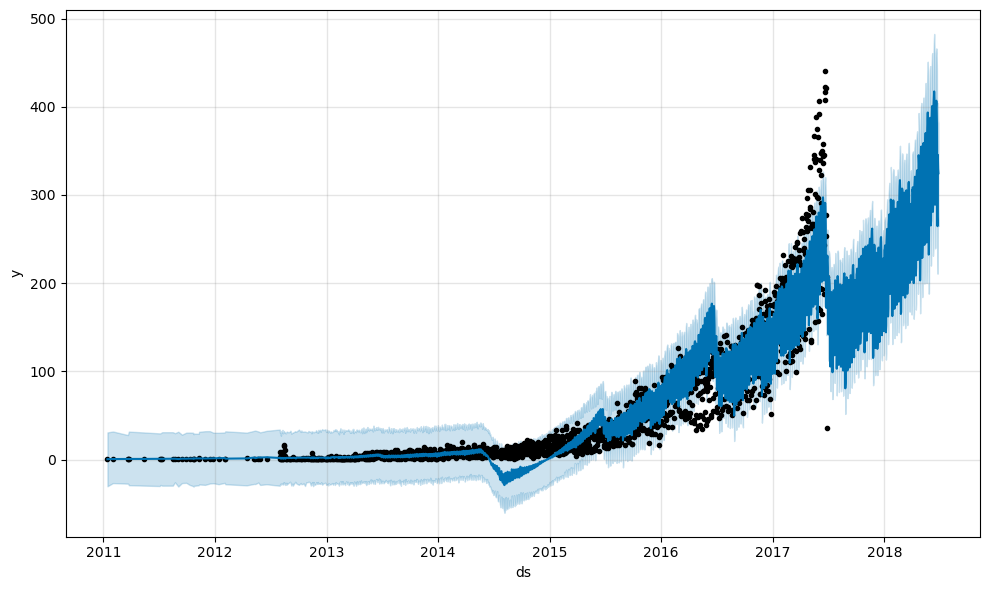

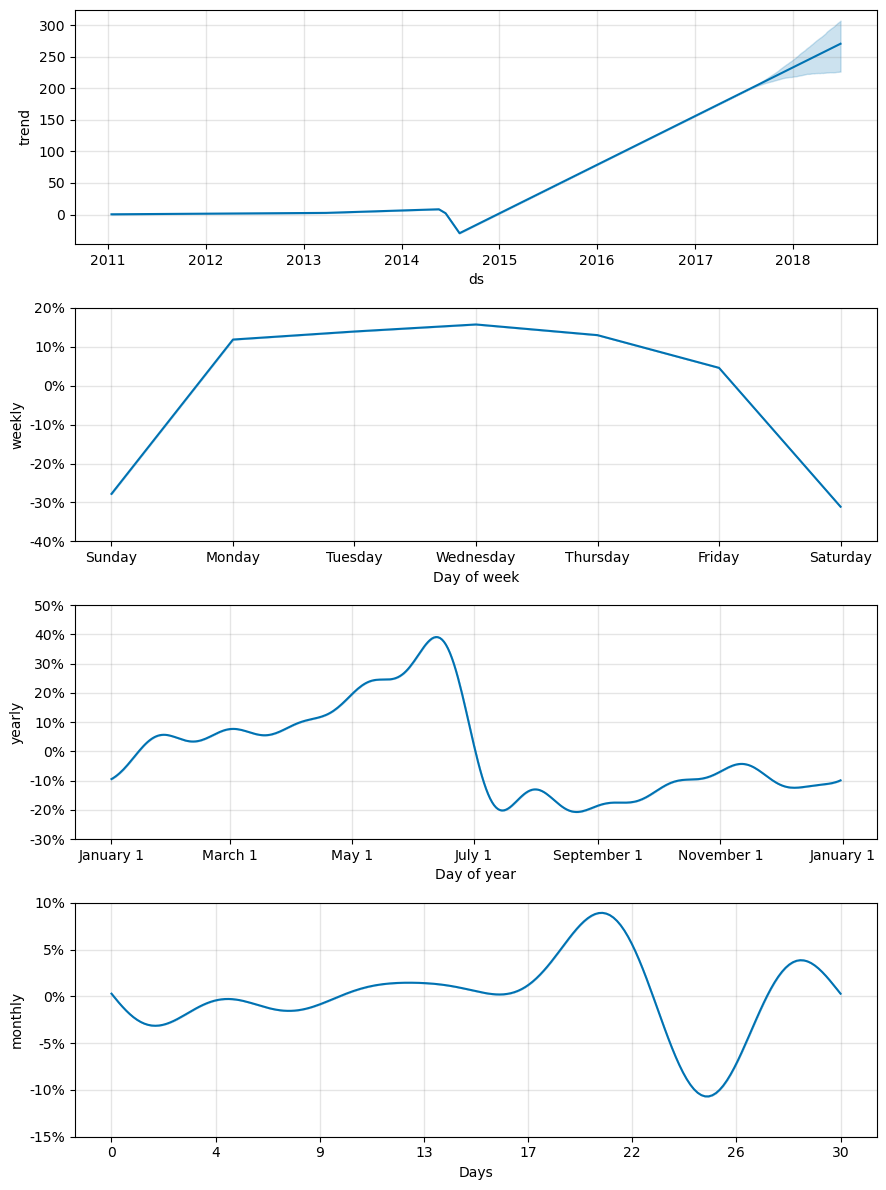

In [21]:
m = Prophet(changepoint_prior_scale=0.3790662578019196, seasonality_prior_scale=0.019885993654687007,
               holidays_prior_scale=8.531573399727314, seasonality_mode="multiplicative",
               changepoint_range=0.3790662578019196)
m.add_seasonality(name='monthly', period=30.4, fourier_order=5)
m.fit(df_by_day)  # Fit model with given params

future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)